# Predicting Company Bankruptcy Using Financial Data

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

In [63]:
df=pd.read_csv('data.csv')

In [64]:
df

Bankrupt?  ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594         
1             1                                           0.464291         
2             1                                           0.426071         
3             1                                           0.399844         
4             1                                           0.465022         
...         ...                                                ...         
6814          0                                           0.493687         
6815          0                                           0.475162         
6816          0                                           0.472725         
6817          0                                           0.506264         
6818          0                                           0.493053         

      ROA(A) before interest and % after tax  \
0                                   0.424389   
1                                   0.538214   
2                                   0.499019   
3                                   0.451265   
4                                   0.538432   
...                                      ...   
6814                                0.539468   
6815                                0.538269   
6816                                0.533744   
6817                                0.559911   
6818                                0.570105   

      ROA(B) before interest and depreciation after tax  \
0                                              0.405750   
1                                              0.516730   
2                                              0.472295   
3                                              0.457733   
4                                              0.522298   
...                                                 ...   
6814                                           0.543230   
6815                                           0.524172   
6816                                           0.520638   
6817                                           0.554045   
6818                                           0.549548   

      Operating Gross Margin  Realized Sales Gross Margin  \
0                   0.601457                     0.601457   
1                   0.610235                     0.610235   
2                   0.601450                     0.601364   
3                   0.583541                     0.583541   
4                   0.598783                     0.598783   
...                      ...                          ...   
6814                0.604455                     0.604462   
6815                0.598308                     0.598308   
6816                0.610444                     0.610213   
6817                0.607850                     0.607850   
6818                0.627409                     0.627409   

      Operating Profit Rate  Pre-tax net Interest Rate  \
0                  0.998969                   0.796887   
1                  0.998946                   0.797380   
2                  0.998857                   0.796403   
3                  0.998700                   0.796967   
4                  0.998973                   0.797366   
...                     ...                        ...   
6814               0.998992                   0.797409   
6815               0.998992                   0.797414   
6816               0.998984                   0.797401   
6817               0.999074                   0.797500   
6818               0.998080                   0.801987   

      After-tax net Interest Rate  \
0                        0.808809   
1                        0.809301   
2                        0.808388   
3                        0.808966   
4                        0.809304   
...                           ...   
6814                     0.809331   
6815                     0.809327   
6816                     0.809317   
6817   

In [4]:
df.head()

Bankrupt?  ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594         
1          1                                           0.464291         
2          1                                           0.426071         
3          1                                           0.399844         
4          1                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non-industry income and expenditure/revenue  ...  \
0                                     0.302646  ...   
1                                     0.303556  ...   
2                                     0.302035  ...   
3                                     0.303350  ...   
4                                     0.303475  ...   

   Net Income to Total Assets  Total assets to GNP price  No-credit Interval  \
0                    0.716845                   0.009219            0.622879   
1                    0.795297                   0.008323            0.623652   
2                    0.774670                   0.040003            0.623841   
3                    0.739555                   0.003252            0.622929   
4                    0.795016                   0.003878            0.623521   

   Gross Profit to Sales  Net Income to Stockholder's Equity  \
0               0.601453                            0.827890   
1               0.610237                            0.839969   
2               0.601449                            0.836774   
3               0.583538                            0.834697   
4               0.598782                            0.839973   

   Liability to Equity  Degree of Financial Leverage (DFL)  \
0             0.290202                            0.026601   
1             0.283846                            0.264577   
2             0.290189                            0.026555   
3             0.281721                            0.026697   
4             0.278514                            0.024752   

   Interest Coverage Ratio (Interest expense to EBIT)  Net Income Flag  \
0                                           0.564050                 1   
1                                           0.570175                 1   
2                                           0.563706                 1   
3                                           0.564663                 1   
4                                           0.575617                 1   

   Equity to Liability  
0             0.016469  
1             0.020794  
2           

In [5]:
df.tail()

Bankrupt?  ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687         
6815          0                                           0.475162         
6816          0                                           0.472725         
6817          0                                           0.506264         
6818          0                                           0.493053         

      ROA(A) before interest and % after tax  \
6814                                0.539468   
6815                                0.538269   
6816                                0.533744   
6817                                0.559911   
6818                                0.570105   

      ROA(B) before interest and depreciation after tax  \
6814                                           0.543230   
6815                                           0.524172   
6816                                           0.520638   
6817                                           0.554045   
6818                                           0.549548   

      Operating Gross Margin  Realized Sales Gross Margin  \
6814                0.604455                     0.604462   
6815                0.598308                     0.598308   
6816                0.610444                     0.610213   
6817                0.607850                     0.607850   
6818                0.627409                     0.627409   

      Operating Profit Rate  Pre-tax net Interest Rate  \
6814               0.998992                   0.797409   
6815               0.998992                   0.797414   
6816               0.998984                   0.797401   
6817               0.999074                   0.797500   
6818               0.998080                   0.801987   

      After-tax net Interest Rate  \
6814                     0.809331   
6815                     0.809327   
6816                     0.809317   
6817                     0.809399   
6818                     0.813800   

      Non-industry income and expenditure/revenue  ...  \
6814                                     0.303510  ...   
6815                                     0.303520  ...   
6816                                     0.303512  ...   
6817                                     0.303498  ...   
6818                                     0.313415  ...   

      Net Income to Total Assets  Total assets to GNP price  \
6814                    0.799927                   0.000466   
6815                    0.799748                   0.001959   
6816                    0.797778                   0.002840   
6817                    0.811808                   0.002837   
6818                    0.815956                   0.000707   

      No-credit Interval  Gross Profit to Sales  \
6814            0.623620               0.604455   
6815            0.623931               0.598306   
6816            0.624156               0.610441   
6817            0.623957               0.607846   
6818            0.626680               0.627408   

      Net Income to Stockholder's Equity  Liability to Equity  \
6814                            0.840359             0.279606   
6815                            0.840306             0.278132   
6816                            0.840138             0.275789   
6817                            0.841084             0.277547   
6818                            0.841019             0.275114   

      Degree of Financial Leverage (DFL)  \
6814                            0.027064   
6815                            0.027009   
6816                            0.026791   
6817                            0.026822   
6818                            0.026793   

      Interest Coverage Ratio (Interest expense to EBIT)  Net Income Flag  \
6814                                           0.566193                 1   
6815                                           0.566018                 1   
6816                                        

In [6]:
df.shape

(6819, 96)

In [7]:
df.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [9]:
df.dtypes

Bankrupt?                                                    int64
ROA(C) before interest and depreciation before interest    float64
ROA(A) before interest and % after tax                     float64
ROA(B) before interest and depreciation after tax          float64
Operating Gross Margin                                     float64
                                                            ...   
Liability to Equity                                        float64
Degree of Financial Leverage (DFL)                         float64
Interest Coverage Ratio (Interest expense to EBIT)         float64
Net Income Flag                                              int64
Equity to Liability                                        float64
Length: 96, dtype: object

In [10]:
df.describe()

Bankrupt?  ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000         
mean      0.032263                                           0.505180         
std       0.176710                                           0.060686         
min       0.000000                                           0.000000         
25%       0.000000                                           0.476527         
50%       0.000000                                           0.502706         
75%       0.000000                                           0.535563         
max       1.000000                                           1.000000         

       ROA(A) before interest and % after tax  \
count                             6819.000000   
mean                                 0.558625   
std                                  0.065620   
min                                  0.000000   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  1.000000   

       ROA(B) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.553589   
std                                             0.061595   
min                                             0.000000   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             1.000000   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             6819.000000                  6819.000000   
mean                 0.607948                     0.607929   
std                  0.016934                     0.016916   
min                  0.000000                     0.000000   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  1.000000                     1.000000   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            6819.000000                6819.000000   
mean                0.998755                   0.797190   
std                 0.013010                   0.012869   
min                 0.000000                   0.000000   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 1.000000                   1.000000   

       After-tax net Interest Rate  \
count                  6819.000000   
mean                      0.809084   
std                       0.013601   
min                       0.000000   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       1.000000   

       Non-industry income and expenditure/revenue  ...  \
count                                  6819.000000  ...   
mean                                      0.303623  ...   
std                                       0.011163  ...   
min                                       0.000000  ...   
25%                                       0.303466  ...   
50%                                       0.303525  ...   
75%                                       0.303585  ...   
max                                       1.000000  ...   

       Net Income to Total Assets  Total assets to GNP price  \
count                 6819.000000               6.819000e+03   
mean                     0.807760               1.862942e+07   
std                      0.040332               3.764501e+08   
min                      0.000000               0.000000e+00   
25%                      0.7

In [11]:
for col in df.describe(include='float').columns:
    print(col)
    print(df[col].unique ())
    print('*'*100)

ROA(C) before interest and depreciation before interest
[0.37059426 0.46429094 0.42607127 ... 0.47433335 0.54789646 0.49953688]
****************************************************************************************************
ROA(A) before interest and % after tax
[0.42438945 0.53821413 0.49901875 ... 0.49329481 0.6067379  0.6480048 ]
****************************************************************************************************
ROA(B) before interest and depreciation after tax
[0.40574977 0.51673002 0.47229509 ... 0.63172547 0.52417153 0.52063815]
****************************************************************************************************
Operating Gross Margin
[0.60145721 0.61023509 0.60145001 ... 0.60445524 0.61044408 0.62740887]
****************************************************************************************************
Realized Sales Gross Margin
[0.60145721 0.61023509 0.60136353 ... 0.60601191 0.61316825 0.62740887]
****************************************

In [12]:
for col in df.describe(include='int').columns:
    print(col)
    print(df[col].unique ())
    print('*'*50)

Bankrupt?
[1 0]
**************************************************
Liability-Assets Flag
[0 1]
**************************************************
Net Income Flag
[1]
**************************************************


In [13]:
df.isnull().sum()

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
                                                          ..
Liability to Equity                                        0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 96, dtype: int64

In [14]:
def identify_and_impute_outliers(df, response_column):
    for column in df.columns:
        if column == response_column:
            continue
        if df[column].dtype in ['int64', 'float64']:  # Only consider numeric columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            print(f"Column: {column}, Outliers Count: {len(outliers)}")
            median = df[column].median()
            df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median
            
    return df
response_column = 'Bankrupt?'
df = identify_and_impute_outliers(df, response_column)

Column: ROA(C) before interest and depreciation before interest, Outliers Count: 391
Column: ROA(A) before interest and % after tax, Outliers Count: 561
Column: ROA(B) before interest and depreciation after tax, Outliers Count: 432
Column: Operating Gross Margin, Outliers Count: 320
Column: Realized Sales Gross Margin, Outliers Count: 318
Column: Operating Profit Rate, Outliers Count: 716
Column: Pre-tax net Interest Rate, Outliers Count: 773
Column: After-tax net Interest Rate, Outliers Count: 867
Column: Non-industry income and expenditure/revenue, Outliers Count: 1094
Column: Continuous interest rate (after tax), Outliers Count: 806
Column: Operating Expense Rate, Outliers Count: 0
Column: Research and development expense rate, Outliers Count: 182
Column: Cash flow rate, Outliers Count: 576
Column: Interest-bearing debt interest rate, Outliers Count: 396
Column: Tax rate (A), Outliers Count: 120
Column: Net Value Per Share (B), Outliers Count: 457
Column: Net Value Per Share (A), Ou

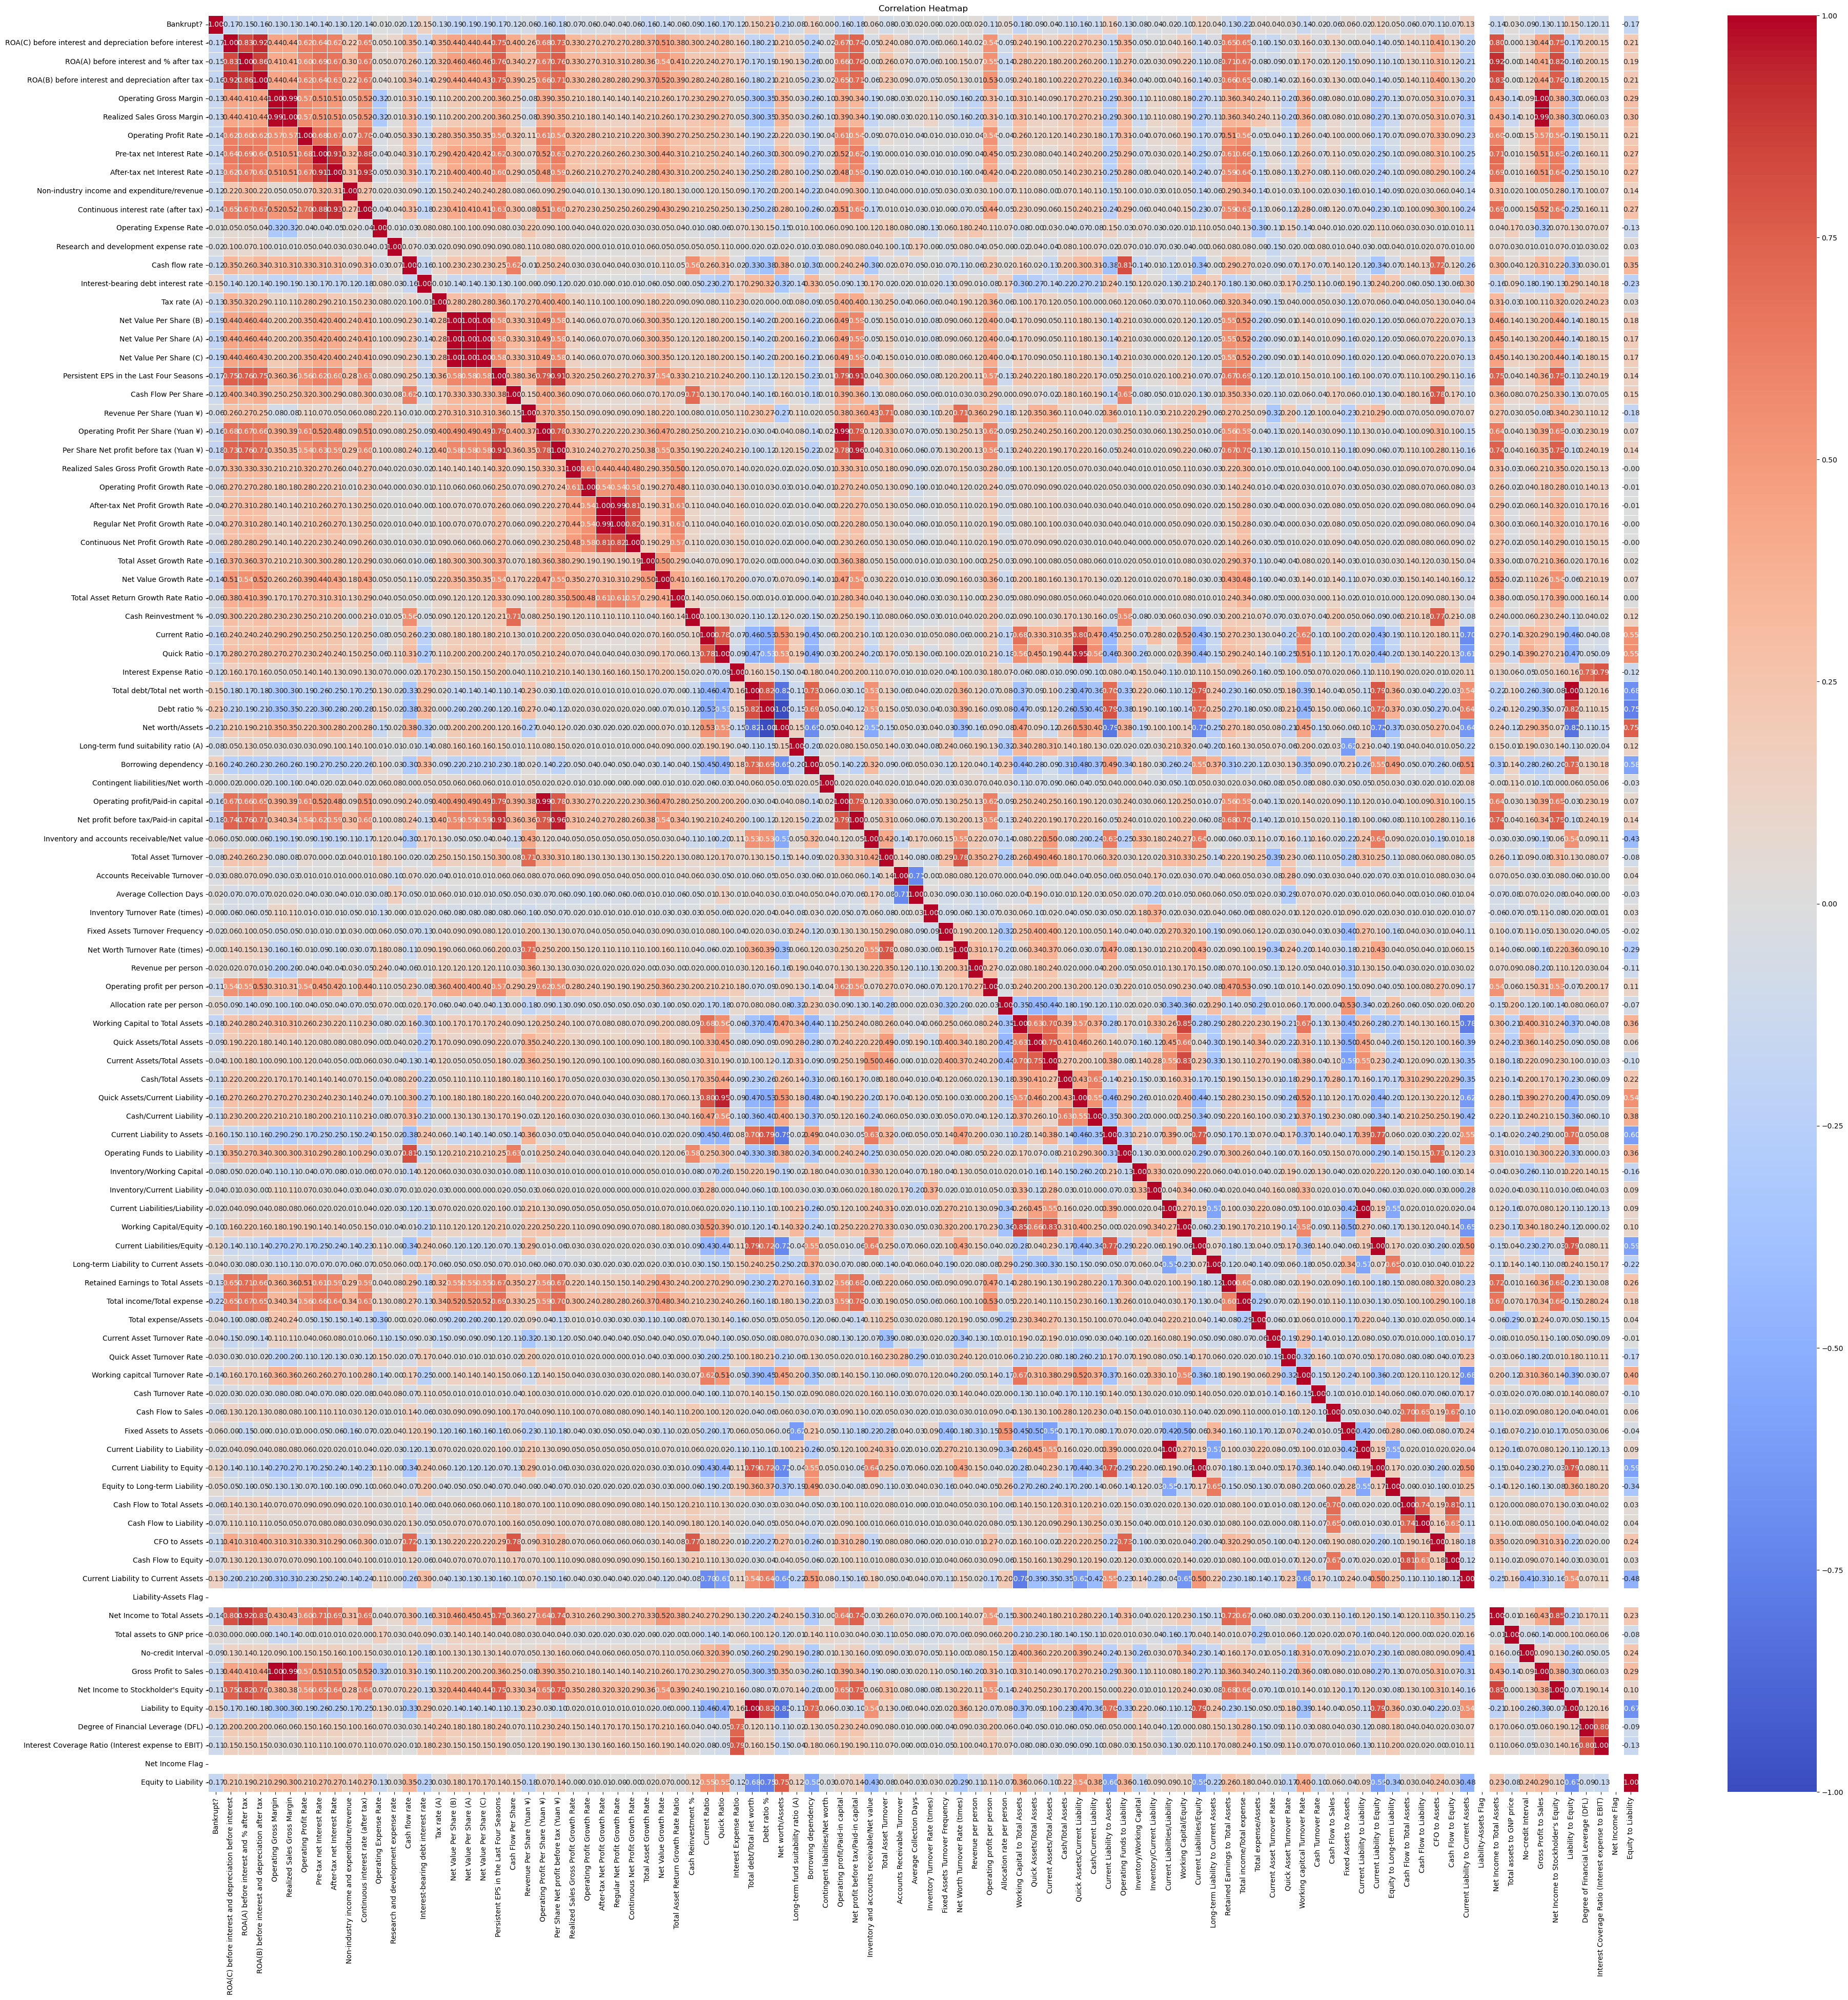

In [17]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(45, 45))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
correlation_matrix = df.corr()
get = (correlation_matrix['Bankrupt?']>0.20) | (correlation_matrix['Bankrupt?']<-0.20)
get.sum()
pred_colms = (get[get].index.to_list())
pred_colms

new_df = df[pred_colms]
new_df.shape

(6819, 4)

In [20]:
new_df

Bankrupt?  Debt ratio %  Net worth/Assets  Total income/Total expense
0             1      0.207576          0.792424                    0.002022
1             1      0.171176          0.828824                    0.002226
2             1      0.207516          0.792484                    0.002060
3             1      0.151465          0.848535                    0.002336
4             1      0.106509          0.893491                    0.002224
...         ...           ...               ...                         ...
6814          0      0.124618          0.875382                    0.002266
6815          0      0.099253          0.900747                    0.002288
6816          0      0.038939          0.961061                    0.002239
6817          0      0.086979          0.913021                    0.002395
6818          0      0.014149          0.985851                    0.002791

[6819 rows x 4 columns]

In [24]:
numeric_categorical_df = df[['Bankrupt?','Liability-Assets Flag','Net Income Flag']]

In [25]:
numeric_categorical_df

Bankrupt?  Liability-Assets Flag  Net Income Flag
0             1                      0                1
1             1                      0                1
2             1                      0                1
3             1                      0                1
4             1                      0                1
...         ...                    ...              ...
6814          0                      0                1
6815          0                      0                1
6816          0                      0                1
6817          0                      0                1
6818          0                      0                1

[6819 rows x 3 columns]

In [28]:
#H0bl There is no association between the 'Bankrupt?' status of a company and its 'Liability-Assets Flag'
contingency_table_liability = pd.crosstab(df['Bankrupt?'], df['Liability-Assets Flag'])
chi2_stat_la, p_value_la, dof_la, expected_freq_la = chi2_contingency(contingency_table_liability)
#H0bn  There is no association between the 'Bankrupt?' status of a company and its 'Net Income Flag'.
contingency_table_ni = pd.crosstab(df['Bankrupt?'], df['Net Income Flag'])
chi2_stat_ni, p_value_ni, dof_ni, expected_freq_ni = chi2_contingency(contingency_table_ni)

In [30]:
print(str(p_value_la)+" "+str(p_value_ni))

1.0 1.0


In [29]:
# based on above chi-square test, it has been found that numeric_categorical data has no effect on the the response variable
# so for analysis part i am not using those 2 columns

# Based on corretion matrix method we have found only 3 columns which are effective immpact on response variable
#although more threshold value less data set columns will lead to strong prediction model i will use only 0.2 as threshold value

# In one way i am doing feature selection for numeric and catgorical data which is not as per proceess
# But instead of doing EDA/ visualization on large amount of predictors, it will be good to perform visualization and modeling on selected columns

#But i am sure that remaining columns also affect respose variable.
# So i am conclude that i am doing this analysis based on very little columns and it may be strong prediction
#in coming future i suggest do analysis based on domain knowledge

In [31]:
new_df.columns=['Bankrupt','Debt_ratio','Net_worth_Assets','income_Expense_Ratio']

In [45]:
new_df.head()

Bankrupt  Debt_ratio  Net_worth_Assets  income_Expense_Ratio
0         1    0.207576          0.792424              0.002022
1         1    0.171176          0.828824              0.002226
2         1    0.207516          0.792484              0.002060
3         1    0.151465          0.848535              0.002336
4         1    0.106509          0.893491              0.002224

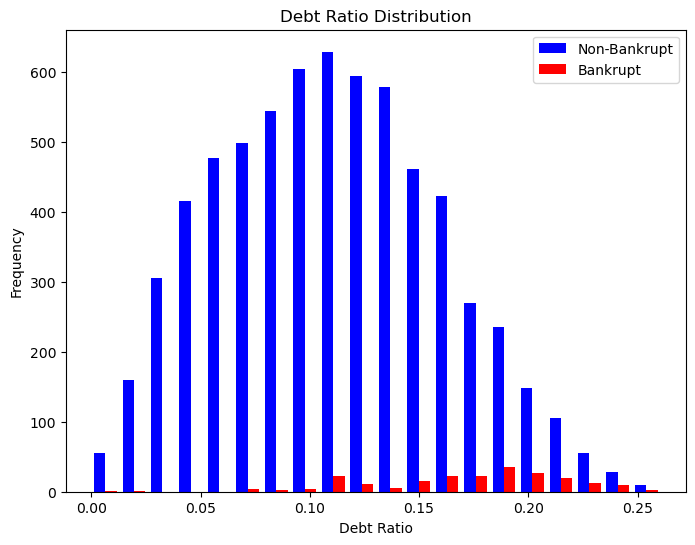

In [39]:
plt.figure(figsize=(8, 6))
plt.hist([new_df[new_df['Bankrupt'] == 0]['Debt_ratio'], new_df[new_df['Bankrupt'] == 1]['Debt_ratio']], bins=20, color=['blue', 'red'], label=['Non-Bankrupt', 'Bankrupt'])
plt.title('Debt Ratio Distribution')
plt.xlabel('Debt Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()


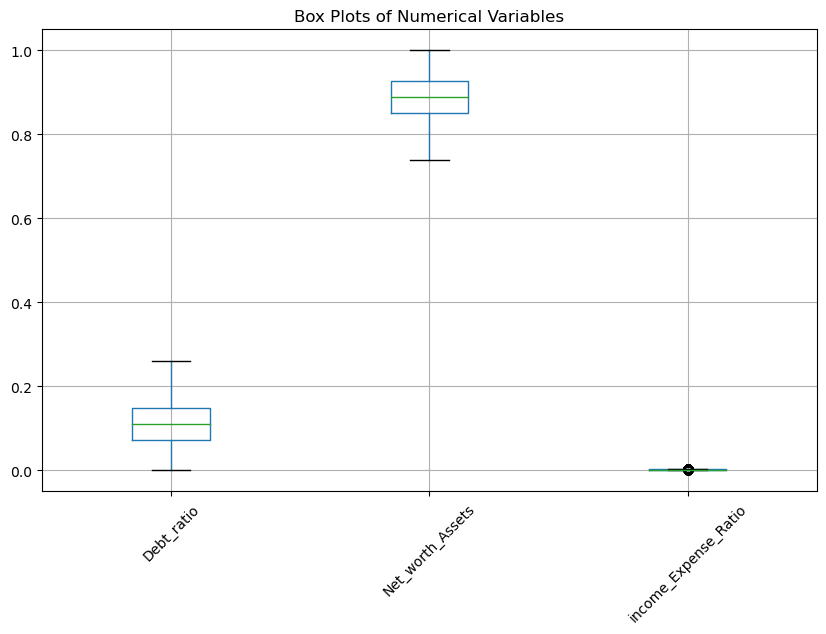

In [35]:
plt.figure(figsize=(10, 6))
new_df.iloc[:, 1:].boxplot()
plt.title('Box Plots of Numerical Variables')
plt.xticks(rotation=45)
plt.show()


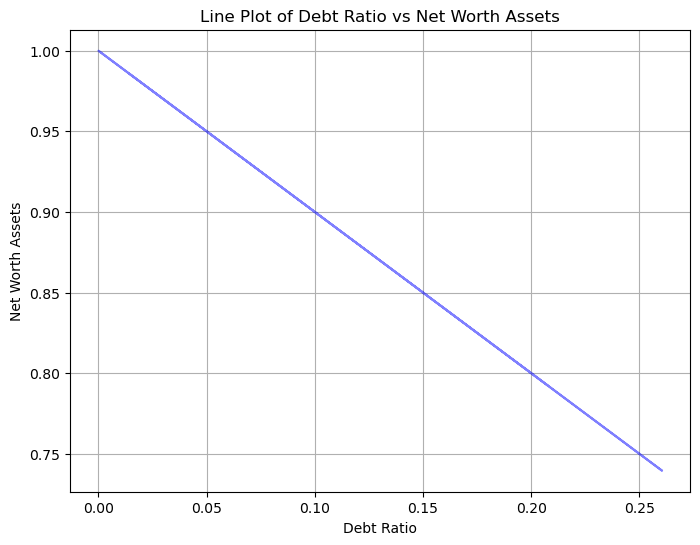

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(new_df['Debt_ratio'], new_df['Net_worth_Assets'], color='blue', alpha=0.5)
plt.title('Line Plot of Debt Ratio vs Net Worth Assets')
plt.xlabel('Debt Ratio')
plt.ylabel('Net Worth Assets')
plt.grid(True)
plt.show()

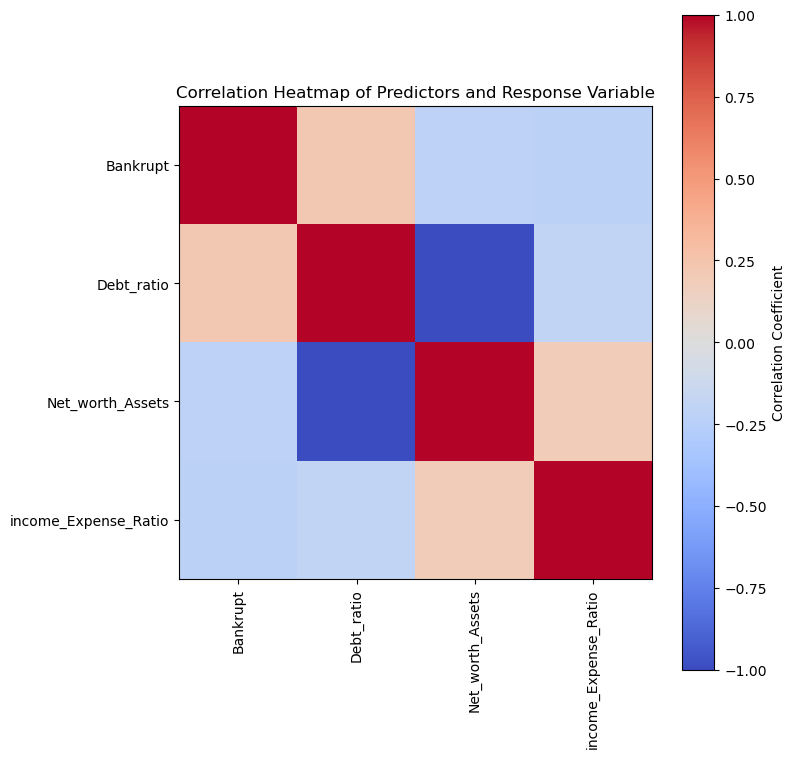

In [37]:
corr_matrix = new_df.corr()
plt.figure(figsize=(8, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Heatmap of Predictors and Response Variable')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.tight_layout()
plt.show()

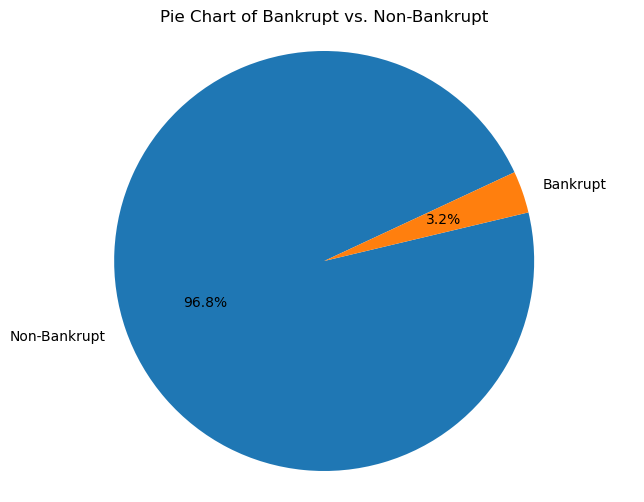

In [56]:
bankrupt_counts = new_df['Bankrupt'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(bankrupt_counts, labels=['Non-Bankrupt', 'Bankrupt'], autopct='%1.1f%%',startangle=25)
plt.title('Pie Chart of Bankrupt vs. Non-Bankrupt')
plt.axis('equal')
plt.show()


In [83]:
x = new_df[['Debt_ratio', 'Net_worth_Assets', 'income_Expense_Ratio']]
y = new_df['Bankrupt']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train=sm.add_constant(x_train,prepend=False)
x_test=sm.add_constant(x_test,prepend=False)
model = sm.MNLogit(y_train, x_train).fit()
y_pred = model.predict(x_test)

         Current function value: 0.096414
         Iterations: 35


In [84]:
print(model.summary())

                          MNLogit Regression Results                          
Dep. Variable:               Bankrupt   No. Observations:                 5455
Model:                        MNLogit   Df Residuals:                     5451
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.3020
Time:                        21:06:57   Log-Likelihood:                -525.94
converged:                      False   LL-Null:                       -753.53
Covariance Type:            nonrobust   LLR p-value:                 2.463e-98
          Bankrupt=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Debt_ratio              17.2469   5.21e+06   3.31e-06      1.000   -1.02e+07    1.02e+07
Net_worth_Assets        -3.3807   5.21e+06  -6.49e-07      1.000   -1.02e+07    1.02e+07
income_Expen

In [ ]:
1. Debt Ratio: The coefficient is very high (17.9178), but the p-value is very high (1.000), 
indicating that the variable is not statistically significant in predicting bankruptcy. Therefore, 
we fail to reject the null hypothesis that the debt ratio has no effect on bankruptcy.

2. Net Worth Assets: The coefficient is negative (-3.4177), but like the debt ratio, the p-value is very high (1.000), 
indicating that this variable is also not statistically significant in predicting bankruptcy.

3. Income Expense Ratio: The coefficient is quite large in magnitude (-7924.3796), 
and the p-value is very low (close to 0), indicating that this variable is statistically significant in predicting bankruptcy. 
Therefore, we reject the null hypothesis that the income expense ratio has no effect on bankruptcy.

Based on this analysis, the income expense ratio seems to be the most influential predictor of bankruptcy among the variables considered.

A higher income expense ratio means a company is spending more compared to its income, which could indicate financial instability and 
increase the likelihood of bankruptcy.
This is evident from its substantial coefficient value (-7924.3796), indicating a strong impact on the likelihood of bankruptcy
Therefore, understanding and managing this ratio is important for avoiding financial distress.

In [ ]:
Debt Ratio (Positive Coefficient): With a coefficient of approximately 17.92, an increase in the debt ratio suggests a higher risk of
  bankruptcy. For each unit increase in the debt ratio, the probability of bankruptcy rises.

2. Net Worth Assets (Negative Coefficient): The coefficient of around -3.42 implies that a decrease in net worth assets elevates the likelihood of
  bankruptcy. Each unit decrease in net worth assets corresponds to a higher probability of facing bankruptcy.

3. Income Expense Ratio (Negative Coefficient): With a coefficient of about -7924.38, an increase in the income
   expense ratio indicates a reduced risk of bankruptcy. For every unit increase in this ratio, the probability of bankruptcy decreases significantly.

In [86]:
y_pred = model.predict(x_test)

In [87]:
y_pred.head()

0         1
239   0.985231  0.014769
2850  0.993688  0.006312
2687  0.998043  0.001957
6500  0.748266  0.251734
2684  0.984981  0.015019

In [88]:
y_test.head()

239     0
2850    0
2687    0
6500    1
2684    0
Name: Bankrupt, dtype: int64

In [75]:
y_pred_class = y_pred.idxmax(axis=1)

In [76]:
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)

In [77]:
accuracy

0.9618768328445748

In [78]:
conf_matrix

array([[1309,    4],
       [  48,    3]], dtype=int64)

In [79]:
precision

0.42857142857142855

In [80]:
recall

0.058823529411764705

In [81]:
f1

0.10344827586206895

In [ ]:
The precision score of 0.4285 indicates that when the model predicts bankruptcy, it is correct approximately 42.8% of the time.
The recall score of 0.058 indicates that the model correctly identifies approximately 5.8% of the actual bankruptcies.

The high accuracy score of 0.960 suggests that the model performs well overall, but the low precision and recall scores 
indicate that it may struggle to correctly identify bankruptcies, which could be due to class imbalance or other factors.

Based on the confusion matrix:

True Negatives (TN): 1309
False Positives (FP): 4
False Negatives (FN): 48
True Positives (TP): 3
This matrix illustrates the model's performance in classifying instances as bankrupt or non-bankrupt. 
It shows that the model correctly identified 1309 instances as non-bankrupt (TN) and 3 instances as bankrupt (TP). 
However, it incorrectly classified 6 instances as bankrupt when they were actually non-bankrupt (FP), and 49 instances as non-bankrupt when they
were actually bankrupt (FN).

In [ ]:
so in summary

The model achieved a high accuracy of 96.18%, indicating that it correctly classified the majority of instances.

However, the precision (42.85%) and recall (5.88%) for bankrupt instances are low, suggesting that the model's ability
to correctly identify bankrupt cases is limited.

The confusion matrix reveals that while the model correctly identified a large number of non-bankrupt instances,
it struggled with correctly classifying bankrupt instances, resulting in a higher number of 
false negatives and false positives.